### Copyright (C) 2020 Sobhan Moradiyan Daghigh - All Rights Reserved
##### 12/5/2020

In [1]:
# !pip install spacy

In [2]:
# !python -m spacy download en_core_web_md

In [3]:
# !python -m spacy link en_core_web_md en

In [4]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import spacy
nlp = spacy.load('en_core_web_md')

In [5]:
dataset = pd.read_excel("./DatasetForClustering.xlsx")
dataset.head()

,ID,ScopH,ScopIntpp,GoSchopp,GoSchcite,GoSchH,Field 1,Field 2,Field 3,Field 4,Field 5,Field 6,Field 7,Field 8,Field 9,Field 10
0,297,15.0,17.0,NaN,NaN,NaN,Zinc,Cadmium,Soil pollution,Organoclay,Calcareous Soil,Bioavailability,Sulfur-oxidizing bacteria,Manures,Soil solutions,Salinity
1,242,12.0,10.0,NaN,NaN,NaN,Yield,Medicinal Plant,Essential oils,Replacement corm,Germination,Azotobacter chroococcum,Crocus sativus,Phytotoxicity,Pseudomonas putida,Calcareous Soil
2,693,NaN,34.0,NaN,NaN,NaN,Wireless sensor networks,Quality of service,Sensor nodes,Sensor networks,Network lifetime,Congestion control,Smart Grid,Internet protocols,Routing protocols,Clustering
3,129,19.0,31.0,259.0,2593.0,25.0,Wireless sensor networks,Quality of service,Congestion control,Sensor nodes,Network lifetime,Sensor networks,Smart Grid,Routing protocols,Internet protocols,Clustering
4,556,7.0,8.0,42.0,283.0,10.0,Wireless sensor networks,Routing protocols,Quality of service,Sensor nodes,Smart Grid,Directional sensor network,Fairness,Coverage,Wireless multimedia sensor network,Optimization problems


In [6]:
dataset = dataset.drop(['ScopH', 'ScopIntpp', 'GoSchopp', 'GoSchcite', 'GoSchH'], axis=1)
dataset.head()

,ID,Field 1,Field 2,Field 3,Field 4,Field 5,Field 6,Field 7,Field 8,Field 9,Field 10
0,297,Zinc,Cadmium,Soil pollution,Organoclay,Calcareous Soil,Bioavailability,Sulfur-oxidizing bacteria,Manures,Soil solutions,Salinity
1,242,Yield,Medicinal Plant,Essential oils,Replacement corm,Germination,Azotobacter chroococcum,Crocus sativus,Phytotoxicity,Pseudomonas putida,Calcareous Soil
2,693,Wireless sensor networks,Quality of service,Sensor nodes,Sensor networks,Network lifetime,Congestion control,Smart Grid,Internet protocols,Routing protocols,Clustering
3,129,Wireless sensor networks,Quality of service,Congestion control,Sensor nodes,Network lifetime,Sensor networks,Smart Grid,Routing protocols,Internet protocols,Clustering
4,556,Wireless sensor networks,Routing protocols,Quality of service,Sensor nodes,Smart Grid,Directional sensor network,Fairness,Coverage,Wireless multimedia sensor network,Optimization problems


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        638 non-null    int64 
 1   Field 1   638 non-null    object
 2   Field 2   638 non-null    object
 3   Field 3   638 non-null    object
 4   Field 4   636 non-null    object
 5   Field 5   630 non-null    object
 6   Field 6   627 non-null    object
 7   Field 7   626 non-null    object
 8   Field 8   621 non-null    object
 9   Field 9   620 non-null    object
 10  Field 10  614 non-null    object
dtypes: int64(1), object(10)
memory usage: 55.0+ KB


In [8]:
dataset = dataset.fillna(' ')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        638 non-null    int64 
 1   Field 1   638 non-null    object
 2   Field 2   638 non-null    object
 3   Field 3   638 non-null    object
 4   Field 4   638 non-null    object
 5   Field 5   638 non-null    object
 6   Field 6   638 non-null    object
 7   Field 7   638 non-null    object
 8   Field 8   638 non-null    object
 9   Field 9   638 non-null    object
 10  Field 10  638 non-null    object
dtypes: int64(1), object(10)
memory usage: 55.0+ KB


In [9]:
def connect_features():
    df = pd.DataFrame()
    df['ID'] = dataset['ID']
    df['Fields'] = dataset[['Field 1', 'Field 2', 'Field 3', 'Field 4', 'Field 5', 'Field 6', 'Field 7', 'Field 8', 'Field 9', 'Field 10']].agg('-'.join, axis=1)
    return df

In [10]:
dataset = connect_features()
dataset.head()

,ID,Fields
0,297,Zinc-Cadmium-Soil pollution-Organoclay-Calcare...
1,242,Yield-Medicinal Plant-Essential oils-Replaceme...
2,693,Wireless sensor networks-Quality of service-Se...
3,129,Wireless sensor networks-Quality of service-Co...
4,556,Wireless sensor networks-Routing protocols-Qua...


In [11]:
def spacy_semantic_similarity(sentence1, sentence2):
    sentence1 = nlp(sentence1)
    sentence2 = nlp(sentence2)
    
    return sentence1.similarity(sentence2)

In [12]:
spacy_semantic_similarity('dog', 'cat')

0.8016854705531046

In [13]:
spacy_semantic_similarity('pen', 'pencil')

0.7085842403739737

In [14]:
spacy_semantic_similarity('dog-pen', 'cat-pencil')

0.8442632419880388

In [15]:
spacy_semantic_similarity('dog-pen', 'pencil-cat')

0.8442632438866646

In [19]:
import pickle

# with open('similarity_matrix', 'wb') as fp:
#     pickle.dump(similarity_matrix, fp)
with open ('./similarity_matrix', 'rb') as fp:
    similarity_matrix = pickle.load(fp)
similarity_matrix

array([[1.        , 0.8636068 , 0.62884218, ..., 0.68453741, 0.84662399,
        0.64814572],
       [0.8636068 , 1.        , 0.60285631, ..., 0.71408574, 0.86481099,
        0.68310445],
       [0.62884218, 0.60285631, 1.        , ..., 0.66912191, 0.71993989,
        0.76247785],
       ...,
       [0.68453741, 0.71408574, 0.66912191, ..., 1.        , 0.83309422,
        0.83355889],
       [0.84662399, 0.86481099, 0.71993989, ..., 0.83309422, 1.        ,
        0.83549071],
       [0.64814572, 0.68310445, 0.76247785, ..., 0.83355889, 0.83549071,
        1.        ]])

In [20]:
similarity_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
for person1 in dataset.iterrows():
    for person2 in dataset.iterrows():
        similarity_matrix[person1[0], person2[0]] = spacy_semantic_similarity(person1[1]['Fields'], person2[1]['Fields'])

In [21]:
similarity_matrix

array([[1.        , 0.8636068 , 0.62884218, ..., 0.68453741, 0.84662399,
        0.64814572],
       [0.8636068 , 1.        , 0.60285631, ..., 0.71408574, 0.86481099,
        0.68310445],
       [0.62884218, 0.60285631, 1.        , ..., 0.66912191, 0.71993989,
        0.76247785],
       ...,
       [0.68453741, 0.71408574, 0.66912191, ..., 1.        , 0.83309422,
        0.83355889],
       [0.84662399, 0.86481099, 0.71993989, ..., 0.83309422, 1.        ,
        0.83549071],
       [0.64814572, 0.68310445, 0.76247785, ..., 0.83355889, 0.83549071,
        1.        ]])

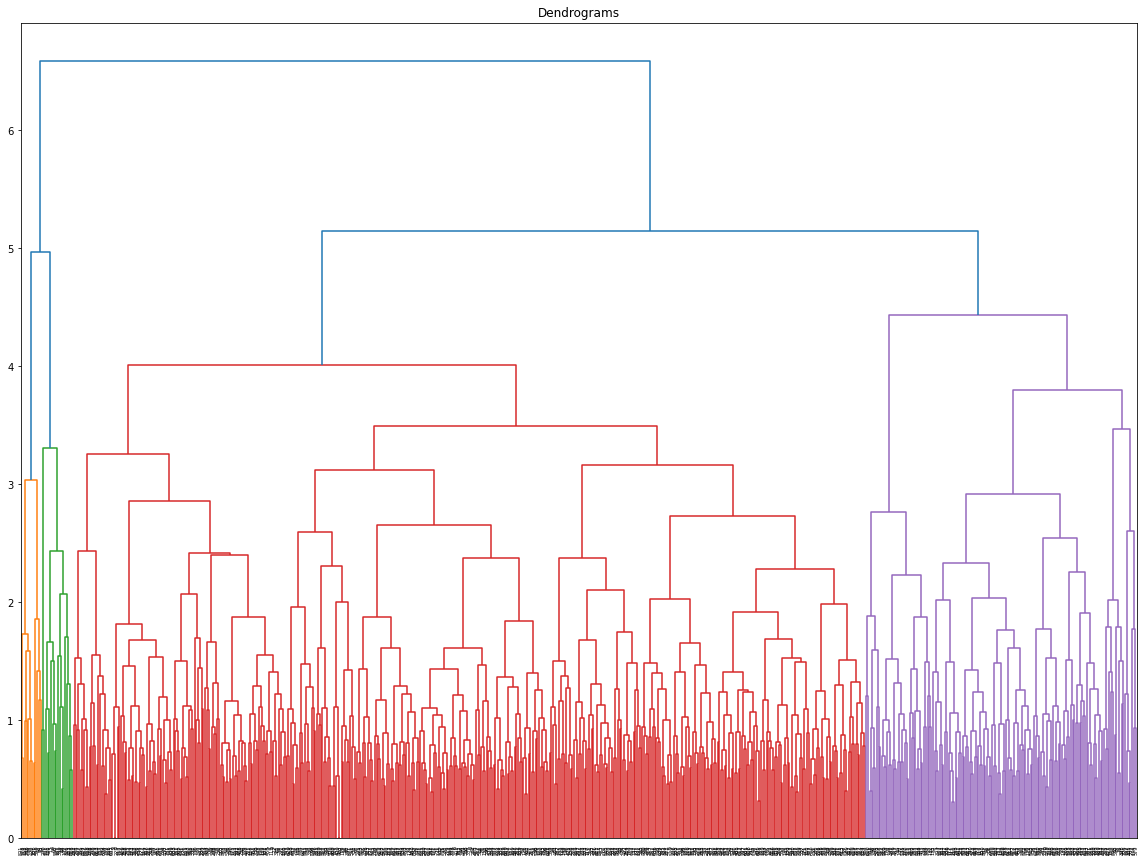

In [22]:
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(similarity_matrix, method='complete'))

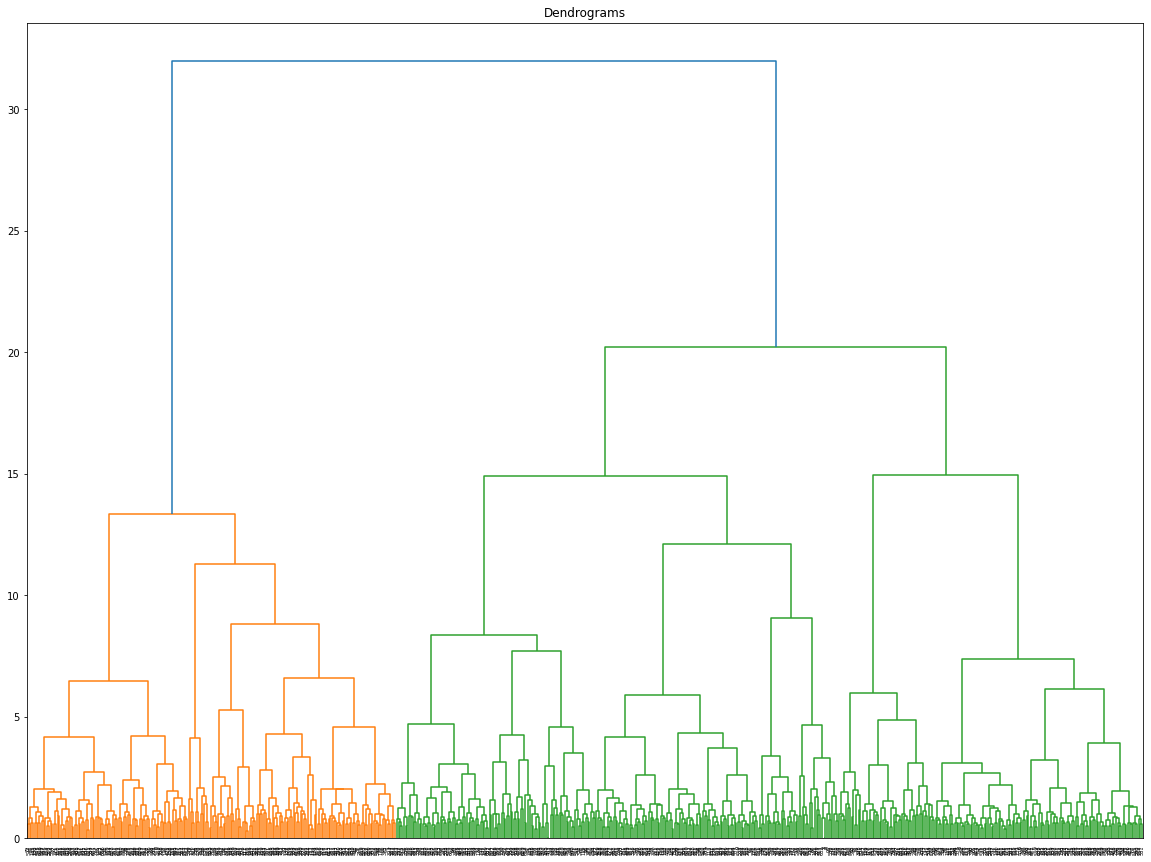

In [23]:
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(similarity_matrix, method='ward'))

In [31]:
model = AgglomerativeClustering(n_clusters=8, linkage='complete').fit(similarity_matrix)
dataset['cluster'] = model.labels_
dataset.head(4)

,ID,Fields,cluster
0,297,Zinc-Cadmium-Soil pollution-Organoclay-Calcare...,6
1,242,Yield-Medicinal Plant-Essential oils-Replaceme...,6
2,693,Wireless sensor networks-Quality of service-Se...,2
3,129,Wireless sensor networks-Quality of service-Co...,2
